# Random Forest Trading

---

### Import Libraries and Dependencies

In [16]:
import pandas as pd
import numpy as np
from pathlib import Path
from joblib import dump, load
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Read in X_test CSV as Pandas DataFrame

In [17]:
# Set path to CSV and read in CSV
csv_path = Path('../Resources/link_x_test.csv')
X_test=pd.read_csv(csv_path)
X_test.set_index(pd.to_datetime(X_test['timestamp'], infer_datetime_format=True), inplace=True)
X_test.drop(columns=['timestamp'], inplace=True)
X_test.head()

,RSI Position,SOSC Position,RSI/MACD Position
timestamp,,,
2020-07-01 00:00:00,0.0,0.0,0.0
2020-07-01 01:00:00,0.0,1.0,0.0
2020-07-01 02:00:00,0.0,1.0,0.0
2020-07-01 03:00:00,0.0,0.0,0.0
2020-07-01 04:00:00,0.0,0.0,0.0


### Read in y_test CSV (Actual Results) as Pandas DataFrame

In [18]:
# Set path to CSV and read in CSV
csv_path = Path('../Resources/link_results.csv')
results = pd.read_csv(csv_path)
results.set_index(pd.to_datetime(results['timestamp'], infer_datetime_format=True), inplace=True)
results.drop(columns=['timestamp'], inplace=True)
results.head()

,Actual Value,Return
timestamp,,
2020-07-01 00:00:00,0.0,-0.002383
2020-07-01 01:00:00,1.0,0.001224
2020-07-01 02:00:00,0.0,-0.001223
2020-07-01 03:00:00,0.0,-0.000943
2020-07-01 04:00:00,1.0,0.001607


### Load Model and Predict y values from X_test Values

In [19]:
# Load the model and make the predictions from the X_test dataset
model = load('../Resources/link_random_forest_model.joblib')
predictions = model.predict(X_test)
predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

### Compare Predicted Results to Y_test (Actual Results)

In [20]:
# Add predicted results to DataFrame
results["Predicted Value"] = predictions
results

,Actual Value,Return,Predicted Value
timestamp,,,
2020-07-01 00:00:00,0.0,-0.002383,0.0
2020-07-01 01:00:00,1.0,0.001224,0.0
2020-07-01 02:00:00,0.0,-0.001223,0.0
2020-07-01 03:00:00,0.0,-0.000943,0.0
2020-07-01 04:00:00,1.0,0.001607,0.0
2020-07-01 05:00:00,1.0,0.002828,0.0
2020-07-01 06:00:00,0.0,-0.005861,0.0
2020-07-01 07:00:00,0.0,-0.000060,0.0
2020-07-01 08:00:00,1.0,0.012557,0.0


### Plot Predicted Results vs. Actual Results

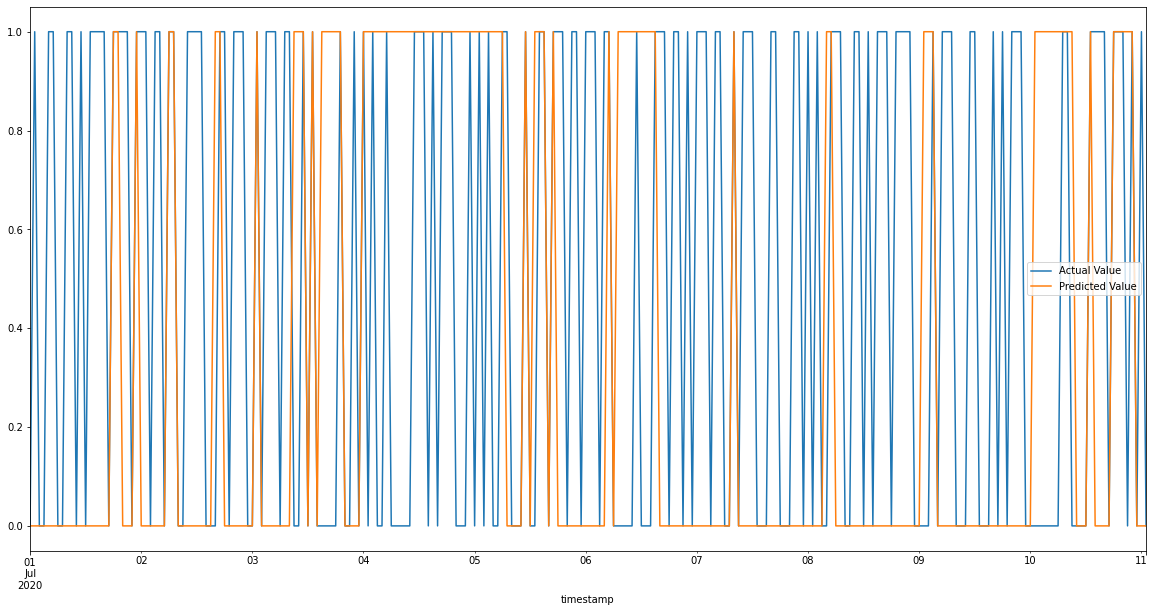

In [21]:
# Plot predicted results vs. actual results
results[['Actual Value', 'Predicted Value']].plot(figsize=(20,10))

### Plot Predicted Results vs. Actual Results (of last 10 records)

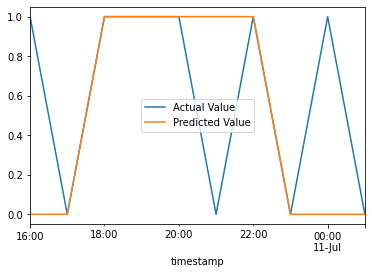

In [22]:
# Plot last 10 records of predicted vs. actual results
results[['Actual Value', 'Predicted Value']].tail(10).plot()

### Replace Predicted Values 0 as -1 (For Shorting)

In [24]:
# Replace predicted values 0 to -1 to account for shorting
results['Predicted Value'].replace(0, -1, inplace=True)
results

,Actual Value,Return,Predicted Value
timestamp,,,
2020-07-01 00:00:00,0.0,-0.002383,-1.0
2020-07-01 01:00:00,1.0,0.001224,-1.0
2020-07-01 02:00:00,0.0,-0.001223,-1.0
2020-07-01 03:00:00,0.0,-0.000943,-1.0
2020-07-01 04:00:00,1.0,0.001607,-1.0
2020-07-01 05:00:00,1.0,0.002828,-1.0
2020-07-01 06:00:00,0.0,-0.005861,-1.0
2020-07-01 07:00:00,0.0,-0.000060,-1.0
2020-07-01 08:00:00,1.0,0.012557,-1.0


### Plot Cumulative Returns of Random Forest Model

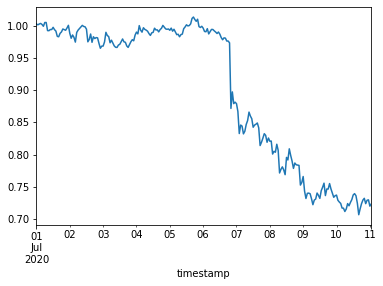

In [25]:
# Calculate cumulative return of model and plot the result
(1 + (results['Return'] * results['Predicted Value'])).cumprod().plot()

### Plot Cumulative Return of Random Forest Model (In Terms of Capital)

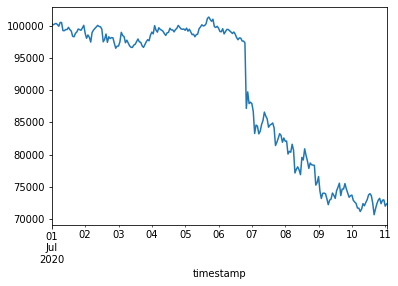

In [27]:
# Set initial capital allocation
initial_capital = 100000

# Plot cumulative return of model in terms of capital
cumulative_return_capital = initial_capital * (1 + (results['Return'] * results['Predicted Value'])).cumprod()
cumulative_return_capital.plot()